In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
# sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
sanjuan_training_dataset = pd.read_csv("drive/My Drive/cdcDengue/dengueData/SanJuan/san_juan_training_data.csv")
print(sanjuan_training_dataset.head())
print("Number of observations: ", len(sanjuan_training_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  988


In [20]:
sanjuan_training_cases = sanjuan_training_dataset["total_cases"].values
print(sanjuan_training_cases.shape)

(988,)


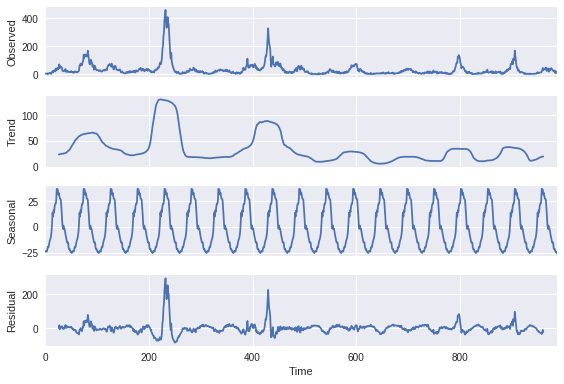

In [22]:
sm.tsa.seasonal_decompose(sanjuan_cases, freq = 52).plot()
print("")

In [23]:
# sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
sanjuan_testing_dataset = pd.read_csv("drive/My Drive/cdcDengue/dengueData/SanJuan/san_juan_testing_data.csv")
print(sanjuan_testing_dataset.head())
print("Number of observations: ", len(sanjuan_testing_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  1196


In [24]:
sanjuan_testing_cases = sanjuan_testing_dataset["total_cases"].values
print(sanjuan_testing_cases.shape)

(1196,)


In [33]:
split_index = len(sanjuan_training_cases)
future_steps = 1
window_size = 4

train = sanjuan_testing_cases[:split_index+window_size]
test = sanjuan_testing_cases[split_index+window_size:]
expected = sanjuan_testing_cases[split_index+window_size:]

print(test[-5:])
print(expected[-5:])

print(train.shape)
print(test.shape)
print(expected.shape)

[56 46 52 34 25]
[56 46 52 34 25]
(992,)
(204,)
(204,)


In [34]:
!pip install statsmodels==0.9.0

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import time
history = [x for x in train]
predictions = list()
start = time.time()
for t in range(len(test)):
    model = ExponentialSmoothing(np.asarray(history) ,seasonal_periods=52 ,trend='add', seasonal='add',)
    
    model_fit = model.fit()
    output = model_fit.forecast(steps=future_steps)
    yhat = output[0]
    predictions.append(yhat)
    obs = expected[t]
    history.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, obs))

end = time.time()
print("Total time: ", end-start)
error = mean_squared_error(expected, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(expected)
plt.plot(predictions, color='red')
plt.show()

ModuleNotFoundError: ignored

In [0]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(expected, predictions)
print(mae)

8.270625003923367
